# Income Group prediction

## Problem Description
Prediction of whether the individual belongs to low income group or high income group.

## Anlaytics Objectives
Not Defined

## Data Set Description
1. age: continuous variable
2. working_sector: sector under which the employee is working
3. financial_weight: weighted attribute to balance the difference in the monetary and working conditions. It is a continuous variable
4. qualification: Educational qualification
5. years_of_education: number of years of education; continuous variable
6. tax paid: amount of tax paid by the person(continuous variable)
7. loan taken: it is a two level categorical variable defining whether the person has taken loan or no
8. marital status: categorical variable
9. occupation : area of work, a categorical variable with 14 levels
10. relationship : provides relationship status of the employee
11. ethnicity : social background (categorical variable )
12. gender: two level categorical variable
13. gain : it illustrates the financial gain of an person, it is a continuous variable
14. loss: financial loss of the person , it is a continuous variable
15. working_hours : it is a continuous variables describing hours of work of an employee in a week
16. country: describes the origin country of an employee
17. target: Based on the given data your model will have to classify a person into high income / low income.

## Considerations
1. While reading the data set replace the 'NA' as NAs

## Algorithm Class
Classification as we are predicting low or high income group, 0/1.

## Import libraries

In [5]:
from IPython.core.interactiveshell import InteractiveShell
import warnings

from tqdm import tqdm
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import random
from string import ascii_letters
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer


In [6]:
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
random.seed(777)

## Import required data

In [7]:
incomeGroup=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/day20/Income Dataset/train_data.csv",na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(incomeGroup.shape[0]))
print("The number of Columns in the Income Group data set =" +str(incomeGroup.shape[1]))


The number of Rows in the Income Group data set  =31587
The number of Columns in the Income Group data set =18


## Feature Analysis

__Columns names and check the datatypes of columns__

In [8]:
print("The columns in the data set are : \n",list(incomeGroup.columns))

The columns in the data set are : 
 ['index', 'age', 'working_sector', 'financial_weight', 'qualification', 'years_of_education', 'tax_paid', 'loan_taken', 'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender', 'gain', 'loss', 'working_hours', 'country', 'target']


In [9]:
print("The data types of the columns are :\n\n",incomeGroup.dtypes)

The data types of the columns are :

 index                   int64
age                   float64
working_sector         object
financial_weight      float64
qualification          object
years_of_education      int64
tax_paid              float64
loan_taken              int64
marital_status         object
occupation             object
relationship           object
ethnicity              object
gender                 object
gain                  float64
loss                  float64
working_hours         float64
country                object
target                  int64
dtype: object


__Check the first and last 10 rows in data set to get an understanding of data__

In [10]:
incomeGroup.head()

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,state,77516.0,Bachelors,13,NaN,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,2,50.0,self_employed,83311.0,Bachelors,13,NaN,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,3,38.0,private,215646.0,HS-grad,9,NaN,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,4,53.0,private,234721.0,11th,7,NaN,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,5,28.0,private,338409.0,Bachelors,13,NaN,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [11]:
incomeGroup.tail()

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
31582,31583,27.0,private,257302.0,Assoc-acdm,12,NaN,0,Married-civilian,support,Wife,White,Female,0.0,0.0,38.0,United-States,0
31583,31584,40.0,private,154374.0,HS-grad,9,NaN,0,Married-civilian,inspector,Husband,White,Male,0.0,0.0,40.0,United-States,1
31584,31585,58.0,private,151910.0,HS-grad,9,NaN,0,Widowed,clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
31585,31586,22.0,private,201490.0,HS-grad,9,7727.924034,1,Never-married,clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0
31586,31587,52.0,self_employed,287927.0,HS-grad,9,NaN,0,Married-civilian,managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,1


__Check the summary of dataframe__

In [12]:
incomeGroup.describe(include="all")

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
count,31587.000000,31585.000000,29812,3.158500e+04,31585,31587.000000,2381.000000,31587.000000,31587,29805,31585,31585,31585,31585.000000,31585.000000,31585.000000,31019,31587.000000
unique,NaN,NaN,7,NaN,16,NaN,NaN,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,NaN,private,NaN,HS-grad,NaN,NaN,NaN,Married-civilian,specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,NaN,22033,NaN,10198,NaN,NaN,NaN,14540,3997,12815,26998,21136,NaN,NaN,NaN,28295,NaN
mean,15794.000000,38.560266,NaN,1.899756e+05,NaN,10.079146,6286.380419,0.050242,NaN,NaN,NaN,NaN,NaN,1090.173405,87.166566,40.439607,NaN,0.241207
std,9118.525813,13.632411,NaN,1.057192e+05,NaN,2.571846,2033.680490,0.218448,NaN,NaN,NaN,NaN,NaN,7444.382583,402.863825,12.368394,NaN,0.427822
min,1.000000,17.000000,NaN,1.228500e+04,NaN,1.000000,2010.469174,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,7897.500000,28.000000,NaN,1.178810e+05,NaN,9.000000,5004.099923,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,15794.000000,37.000000,NaN,1.785640e+05,NaN,10.000000,6381.934626,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,23690.500000,48.000000,NaN,2.374660e+05,NaN,12.000000,7967.520312,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


__Check the unique levels in the target attribute target and also check for the percentage distribution__

In [13]:
(incomeGroup["target"].value_counts()/incomeGroup.shape[0])*100

0    75.879317
1    24.120683
Name: target, dtype: float64

__Check count of null in each column & its percent__

In [14]:
pd.DataFrame({'total_missing': incomeGroup.isnull().sum(), 
              'perc_missing': (incomeGroup.isnull().sum()/incomeGroup.shape[0])*100})

,total_missing,perc_missing
index,0,0.000000
age,2,0.006332
working_sector,1775,5.619400
financial_weight,2,0.006332
qualification,2,0.006332
years_of_education,0,0.000000
tax_paid,29206,92.462089
loan_taken,0,0.000000
marital_status,0,0.000000
occupation,1782,5.641561


__Check for monotonically incraesing columns__

In [15]:
for col in incomeGroup.columns :
    if(incomeGroup[col].is_monotonic) :
        print("Column :", col, ": is Monotonically increasing")

Column : index : is Monotonically increasing


__Check for count of unique values in different attriutes__

In [16]:
incomeGroup.nunique()

index                 31587
age                      73
working_sector            7
financial_weight      21198
qualification            16
years_of_education       16
tax_paid               1968
loan_taken                2
marital_status            7
occupation               14
relationship              6
ethnicity                 5
gender                    2
gain                    119
loss                     92
working_hours            94
country                  41
target                    2
dtype: int64

__Check for distribution of variables__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1be59860>,
      dtype=object)

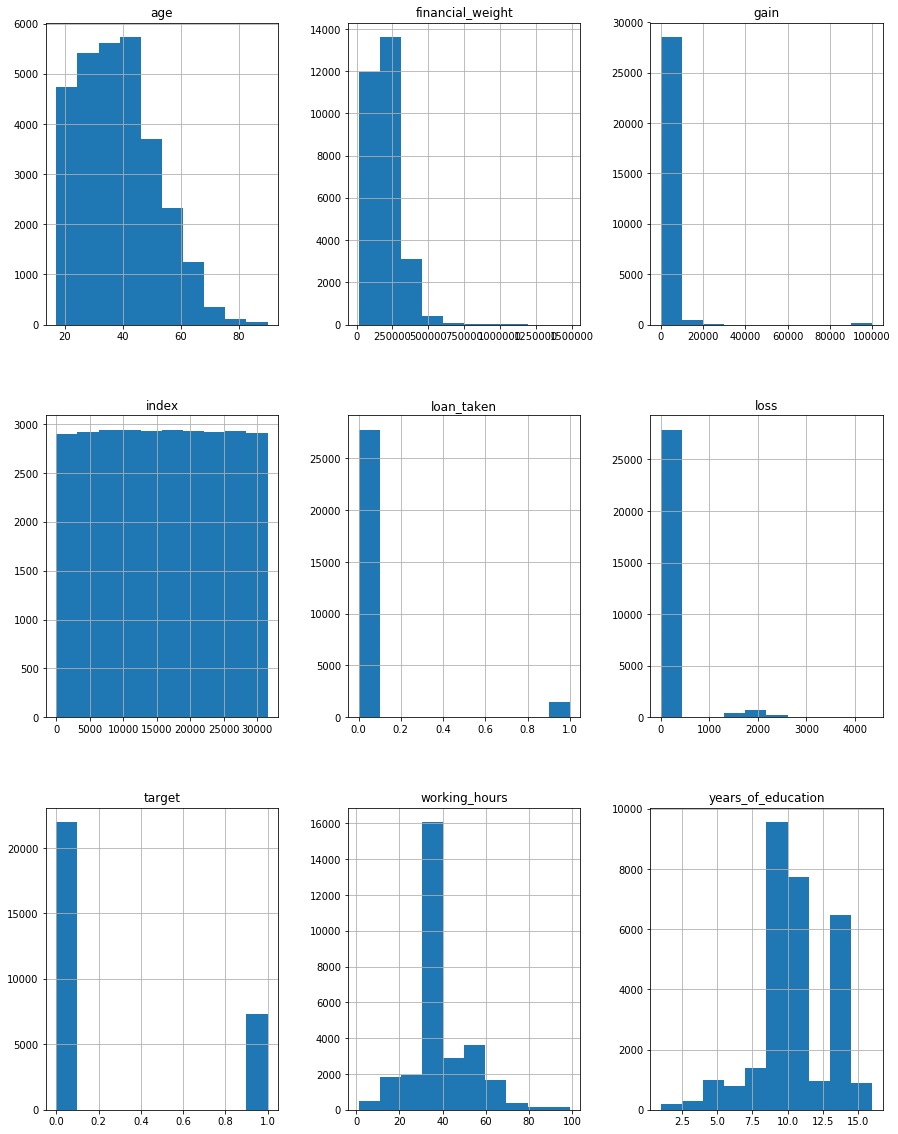

In [17]:
distribution_incomeGroup = incomeGroup.drop('tax_paid', axis=1).dropna()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
distribution_incomeGroup.hist(ax = ax)

In [18]:
#Loss & Gain have almost all values as 0, check percentage

#% Rows with Values of loss more than 0
(distribution_incomeGroup[distribution_incomeGroup["loss"]>0].shape[0]/distribution_incomeGroup.shape[0])*100

#% Rows with Values of gain more than 0
(distribution_incomeGroup[distribution_incomeGroup["gain"]>0].shape[0]/distribution_incomeGroup.shape[0])*100


4.711952436274175

8.48083099842821

__Check for possible candidates of categorical values__
1. Columns with Num of unique values less than 20

In [19]:
for col in incomeGroup.columns :
    if (len(incomeGroup[col].unique()) <= 20):
        print(col, len(incomeGroup[col].unique()))

working_sector 8
qualification 17
years_of_education 16
loan_taken 2
marital_status 7
occupation 15
relationship 7
ethnicity 6
gender 3
target 2


In [20]:
#Columns with possible numeric types
for col in incomeGroup.columns :
    if (len(incomeGroup[col].unique()) > 20):
        print(col, len(incomeGroup[col].unique()))

index 31587
age 74
financial_weight 21199
tax_paid 1969
gain 120
loss 93
working_hours 95
country 42


__Check for unique values of categorical variables__

In [21]:
for col in incomeGroup.select_dtypes(include=['object']).columns:
    incomeGroup[col].unique()

array(['state', 'self_employed', 'private', 'national', 'local_body', nan,
       'without_pay', 'not_worked'], dtype=object)

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th', nan], dtype=object)

array(['Never-married', 'Married-civilian', 'Divorced',
       'Married-non-resident', 'Separated', 'Married-defence', 'Widowed'],
      dtype=object)

array(['clerical', 'managerial', 'cleaner', 'specialty', 'other', 'sales',
       'repair', 'transport', 'farming', 'inspector', 'support', nan,
       'guard', 'defence', 'house_servant'], dtype=object)

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative', nan], dtype=object)

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other', nan], dtype=object)

array([' Male', ' Female', nan], dtype=object)

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

__Check distribution of qualification, years_of_education and occupation that are categorical, but many categories__

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Qualification variation')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Qualification')

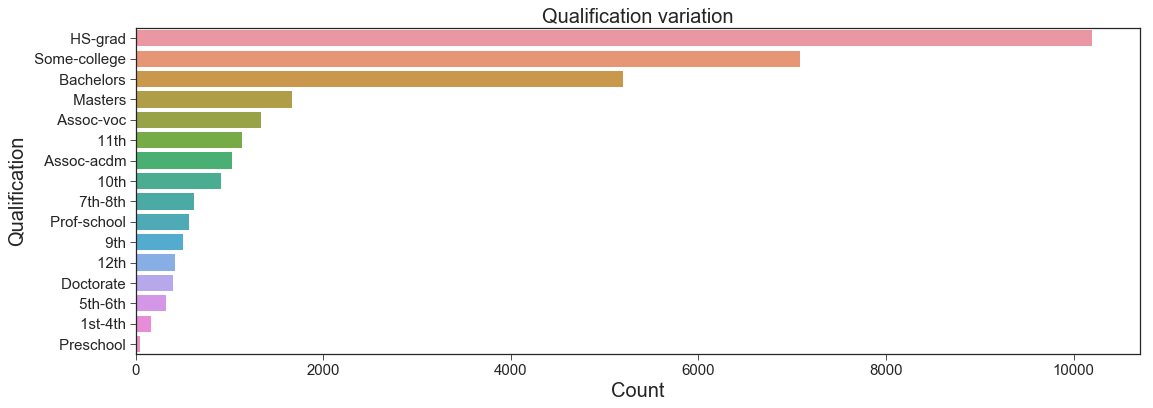

In [22]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="qualification", data=incomeGroup, order = 
                       incomeGroup['qualification'].value_counts().index)
plot_1.axes.set_title("Qualification variation",fontsize=20)
plot_1.set_xlabel("Count",fontsize=20)
plot_1.set_ylabel("Qualification",fontsize=20)
plot_1.tick_params(labelsize=15)
plt.show()


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'years_of_education variation')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'years_of_education')

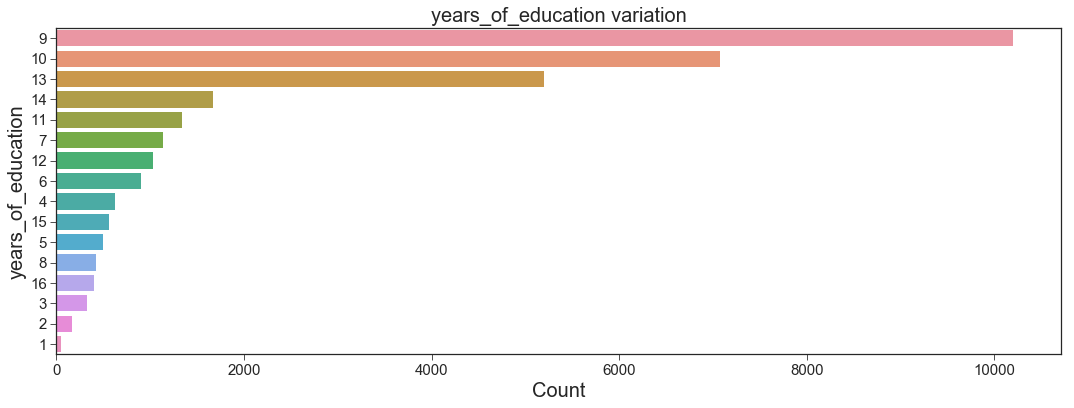

In [23]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="years_of_education", data=incomeGroup, order = 
                       incomeGroup['years_of_education'].value_counts().index)
plot_1.axes.set_title("years_of_education variation",fontsize=20)
plot_1.set_xlabel("Count",fontsize=20)
plot_1.set_ylabel("years_of_education",fontsize=20)
plot_1.tick_params(labelsize=15)
plt.show()


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'occupation variation')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'occupation')

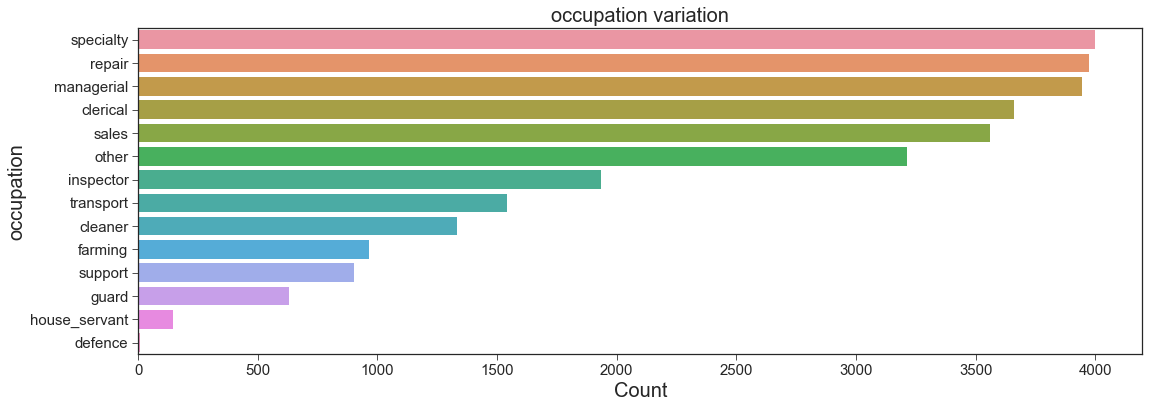

In [24]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="occupation", data=incomeGroup, order = 
                       incomeGroup['occupation'].value_counts().index)
plot_1.axes.set_title("occupation variation",fontsize=20)
plot_1.set_xlabel("Count",fontsize=20)
plot_1.set_ylabel("occupation",fontsize=20)
plot_1.tick_params(labelsize=15)
plt.show()


__Outlier Detection : Boxplot of numerical variables__

<Figure size 1296x648 with 0 Axes>

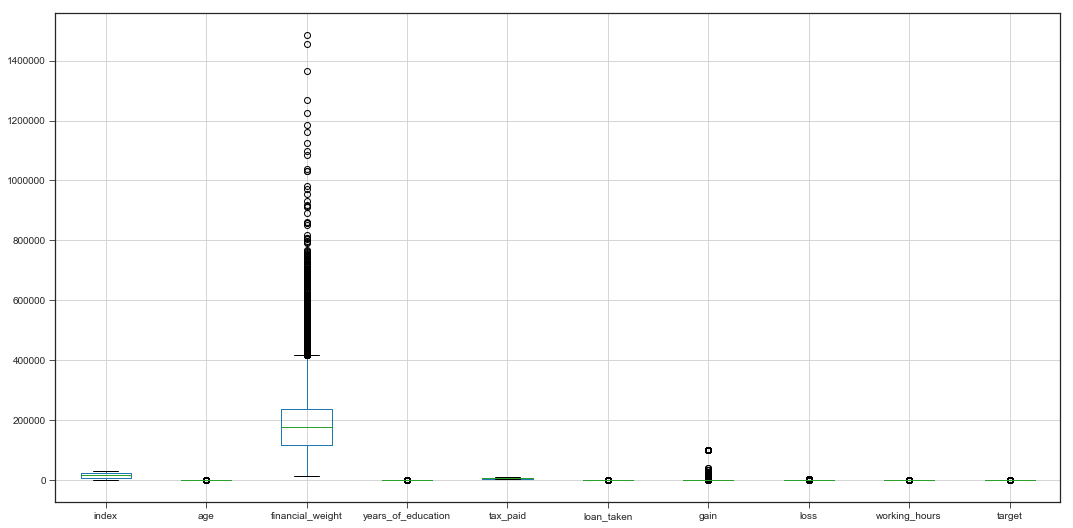

In [25]:
num_col_df = incomeGroup.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(18,9))
num_col_df.boxplot()

In [26]:
# Number of data points above specific threshold
(incomeGroup[incomeGroup['financial_weight']>800000].shape[0]/incomeGroup.shape[0])*100
incomeGroup = incomeGroup[incomeGroup['financial_weight']<800000]

0.0918099218032735

<Figure size 1296x648 with 0 Axes>

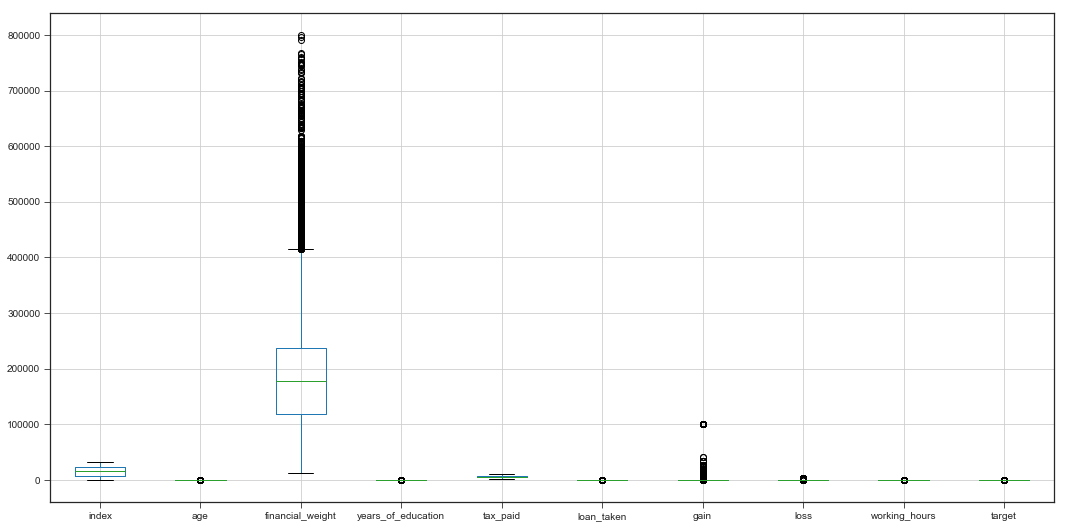

In [27]:
num_col_df = incomeGroup.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(18,9))
num_col_df.boxplot()

__Outlier Detection : Boxplot of categorical variables__

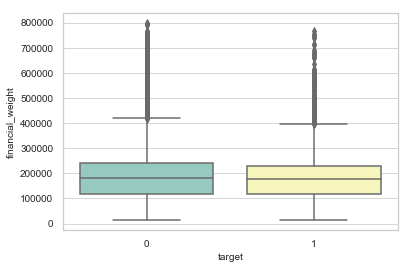

In [28]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="target", y="financial_weight",data=incomeGroup, palette="Set3")

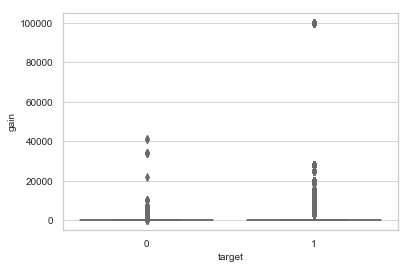

In [29]:
ax = sns.boxplot(x="target", y="gain",data=incomeGroup, palette="Set3")

In [30]:
# Number of data points above specific threshold
(incomeGroup[incomeGroup['gain']>80000].shape[0]/incomeGroup.shape[0])*100
incomeGroup = incomeGroup[incomeGroup['gain']<80000]

0.4975282038281151

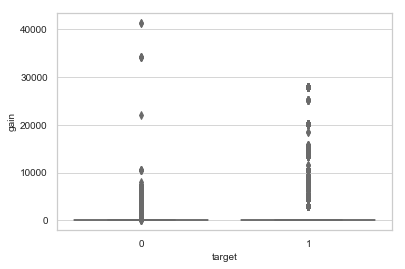

In [31]:
ax = sns.boxplot(x="target", y="gain",data=incomeGroup, palette="Set3")

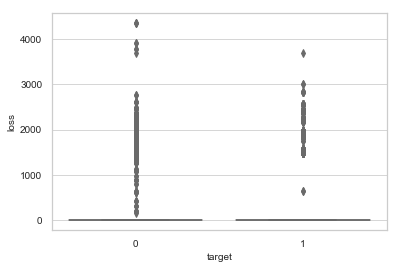

In [32]:
ax = sns.boxplot(x="target", y="loss",data=incomeGroup, palette="Set3")

In [33]:
incomeGroup.shape

(31399, 18)

__Detect outliers : Based on entire row__

__Detect outliers : Based on target row__

__Correlation between attributes__

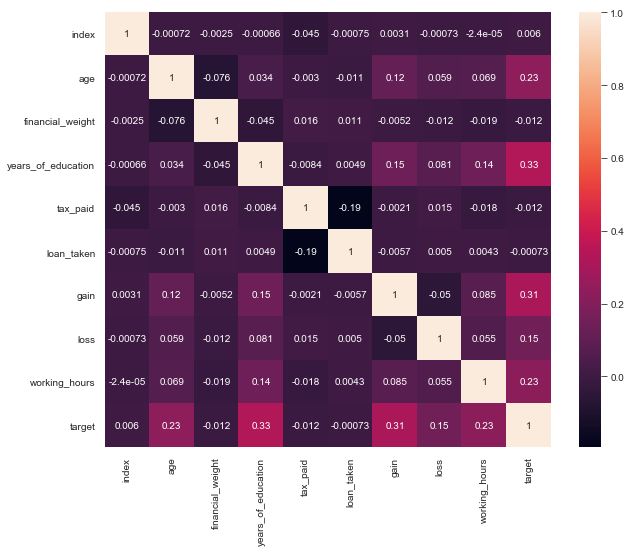

In [34]:
# Compute the correlation matrix
corr = incomeGroup.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax, annot=True)

__Observation :-__
1. index : monotonically increasing field
2. tax_paid : ~93% of rows are NA's
3. Bin 'Qualification variation', years_of_education
4. Remove any row with more than 2 column attributes as null/missing.
5. Impute missing values in other columns with mean/mode.
6. financial_weight has lot of values that are outliers(individually)
7. Loss & gain have 
8. Outlier Detection
    a. financial_weight, gain attributes have outliers, removed.
9. None of the Attributes are correlated.

## Data Alteration

__Drop required fields__
1. index : monotonically increasing field
2. tax_paid : ~93% of rows are NA's

In [35]:
incomeGroup_1 = incomeGroup.drop(["index","tax_paid"],axis=1)
incomeGroup_1.head()

,age,working_sector,financial_weight,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,39.0,state,77516.0,Bachelors,13,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,self_employed,83311.0,Bachelors,13,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,private,215646.0,HS-grad,9,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,private,234721.0,11th,7,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,private,338409.0,Bachelors,13,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


__Drop rows with more than 2 missing values__

In [36]:
incomeGroup_2 = incomeGroup_1.dropna(thresh = incomeGroup_1.shape[1]-2)
pd.DataFrame({'total_missing': incomeGroup_1.isnull().sum(), 
              'perc_missing': (incomeGroup_1.isnull().sum()/incomeGroup_1.shape[0])*100})

,total_missing,perc_missing
age,0,0.000000
working_sector,1766,5.624383
financial_weight,0,0.000000
qualification,0,0.000000
years_of_education,0,0.000000
loan_taken,0,0.000000
marital_status,0,0.000000
occupation,1773,5.646677
relationship,0,0.000000
ethnicity,0,0.000000


__Datatype alterations__

__Bin Qualification variation, years_of_education__

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'Qualification variation')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Qualification')

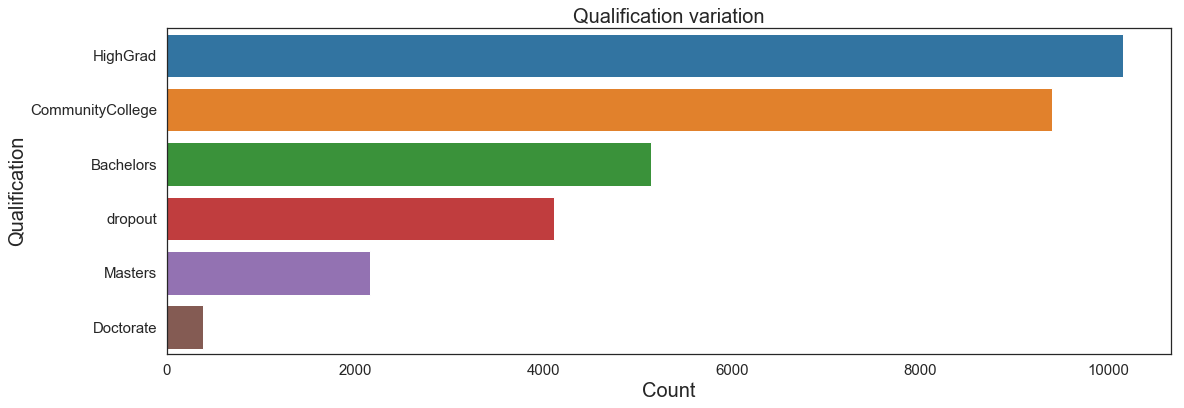

In [37]:
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Preschool', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('10th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('11th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('12th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('1st-4th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('5th-6th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('7th-8th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('9th', 'dropout')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('HS-grad', 'HighGrad')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Some-college', 'CommunityCollege')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Assoc-acdm', 'CommunityCollege')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Assoc-voc', 'CommunityCollege')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Bachelors', 'Bachelors')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Masters', 'Masters')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Prof-school', 'Masters')
incomeGroup_2['qualification'] = incomeGroup_2['qualification'].str.strip().replace('Doctorate', 'Doctorate')


plt.figure(figsize=(18,6))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="qualification", data=incomeGroup_2, order = 
                       incomeGroup_2['qualification'].value_counts().index)
plot_1.axes.set_title("Qualification variation",fontsize=20)
plot_1.set_xlabel("Count",fontsize=20)
plot_1.set_ylabel("Qualification",fontsize=20)
plot_1.tick_params(labelsize=15)
plt.show()


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'years_of_education variation')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'years_of_education')

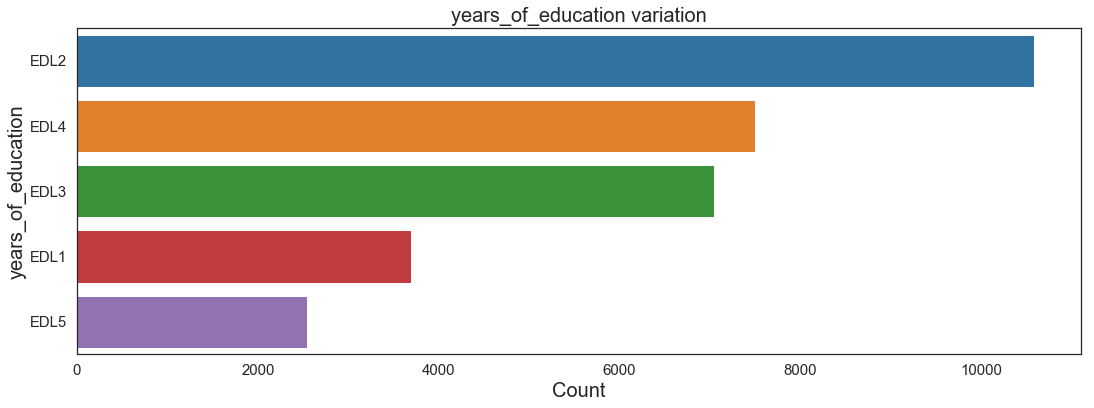

In [38]:
bins = [0,7, 9, 10, 13,16]
labels = ['EDL1','EDL2','EDL3','EDL4','EDL5']
incomeGroup_2['years_of_education'] = pd.cut(incomeGroup_2['years_of_education'], bins=bins, labels=labels)



plt.figure(figsize=(18,6))
plt.style.use('seaborn-ticks')
plot_1 = sns.countplot(y="years_of_education", data=incomeGroup_2, order = 
                       incomeGroup_2['years_of_education'].value_counts().index)
plot_1.axes.set_title("years_of_education variation",fontsize=20)
plot_1.set_xlabel("Count",fontsize=20)
plot_1.set_ylabel("years_of_education",fontsize=20)
plot_1.tick_params(labelsize=15)
plt.show()


In [39]:
incomeGroup_2.dtypes

age                    float64
working_sector          object
financial_weight       float64
qualification           object
years_of_education    category
loan_taken               int64
marital_status          object
occupation              object
relationship            object
ethnicity               object
gender                  object
gain                   float64
loss                   float64
working_hours          float64
country                 object
target                   int64
dtype: object

In [40]:
incomeGroup_2.head()

,age,working_sector,financial_weight,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,39.0,state,77516.0,Bachelors,EDL4,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,self_employed,83311.0,Bachelors,EDL4,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,private,215646.0,HighGrad,EDL2,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,private,234721.0,dropout,EDL1,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,private,338409.0,Bachelors,EDL4,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


__Assumption :__
    1. Country should be categorical though it has 42 possible values.

In [41]:
cat_col = ['working_sector', 'qualification', 'years_of_education','loan_taken','marital_status', 'occupation', 'relationship', 
           'ethnicity', 'gender', 'country', 'target']
num_col = np.setdiff1d(incomeGroup_2.columns, cat_col)


In [42]:
cat_col
num_col

['working_sector',
 'qualification',
 'years_of_education',
 'loan_taken',
 'marital_status',
 'occupation',
 'relationship',
 'ethnicity',
 'gender',
 'country',
 'target']

array(['age', 'financial_weight', 'gain', 'loss', 'working_hours'],
      dtype=object)

In [43]:
#Do the datatype conversion
for col in cat_col:
    incomeGroup_2[col] = incomeGroup_2[col].astype('category', copy=True)

for col in num_col:
    incomeGroup_2[col] = incomeGroup_2[col].astype('float', copy=True)


In [44]:
incomeGroup_2.dtypes

age                    float64
working_sector        category
financial_weight       float64
qualification         category
years_of_education    category
loan_taken            category
marital_status        category
occupation            category
relationship          category
ethnicity             category
gender                category
gain                   float64
loss                   float64
working_hours          float64
country               category
target                category
dtype: object

In [45]:
incomeGroup_2.shape

(31372, 16)

In [46]:
incomeGroup_2.head()

,age,working_sector,financial_weight,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,39.0,state,77516.0,Bachelors,EDL4,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,self_employed,83311.0,Bachelors,EDL4,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,private,215646.0,HighGrad,EDL2,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,private,234721.0,dropout,EDL1,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,private,338409.0,Bachelors,EDL4,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


## EDA

__Correlation between attributes__

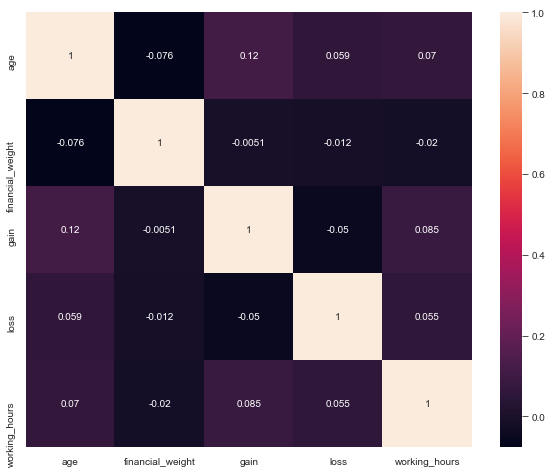

In [47]:
# Compute the correlation matrix
corr = incomeGroup_2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax, annot=True)

__Pair Plot__

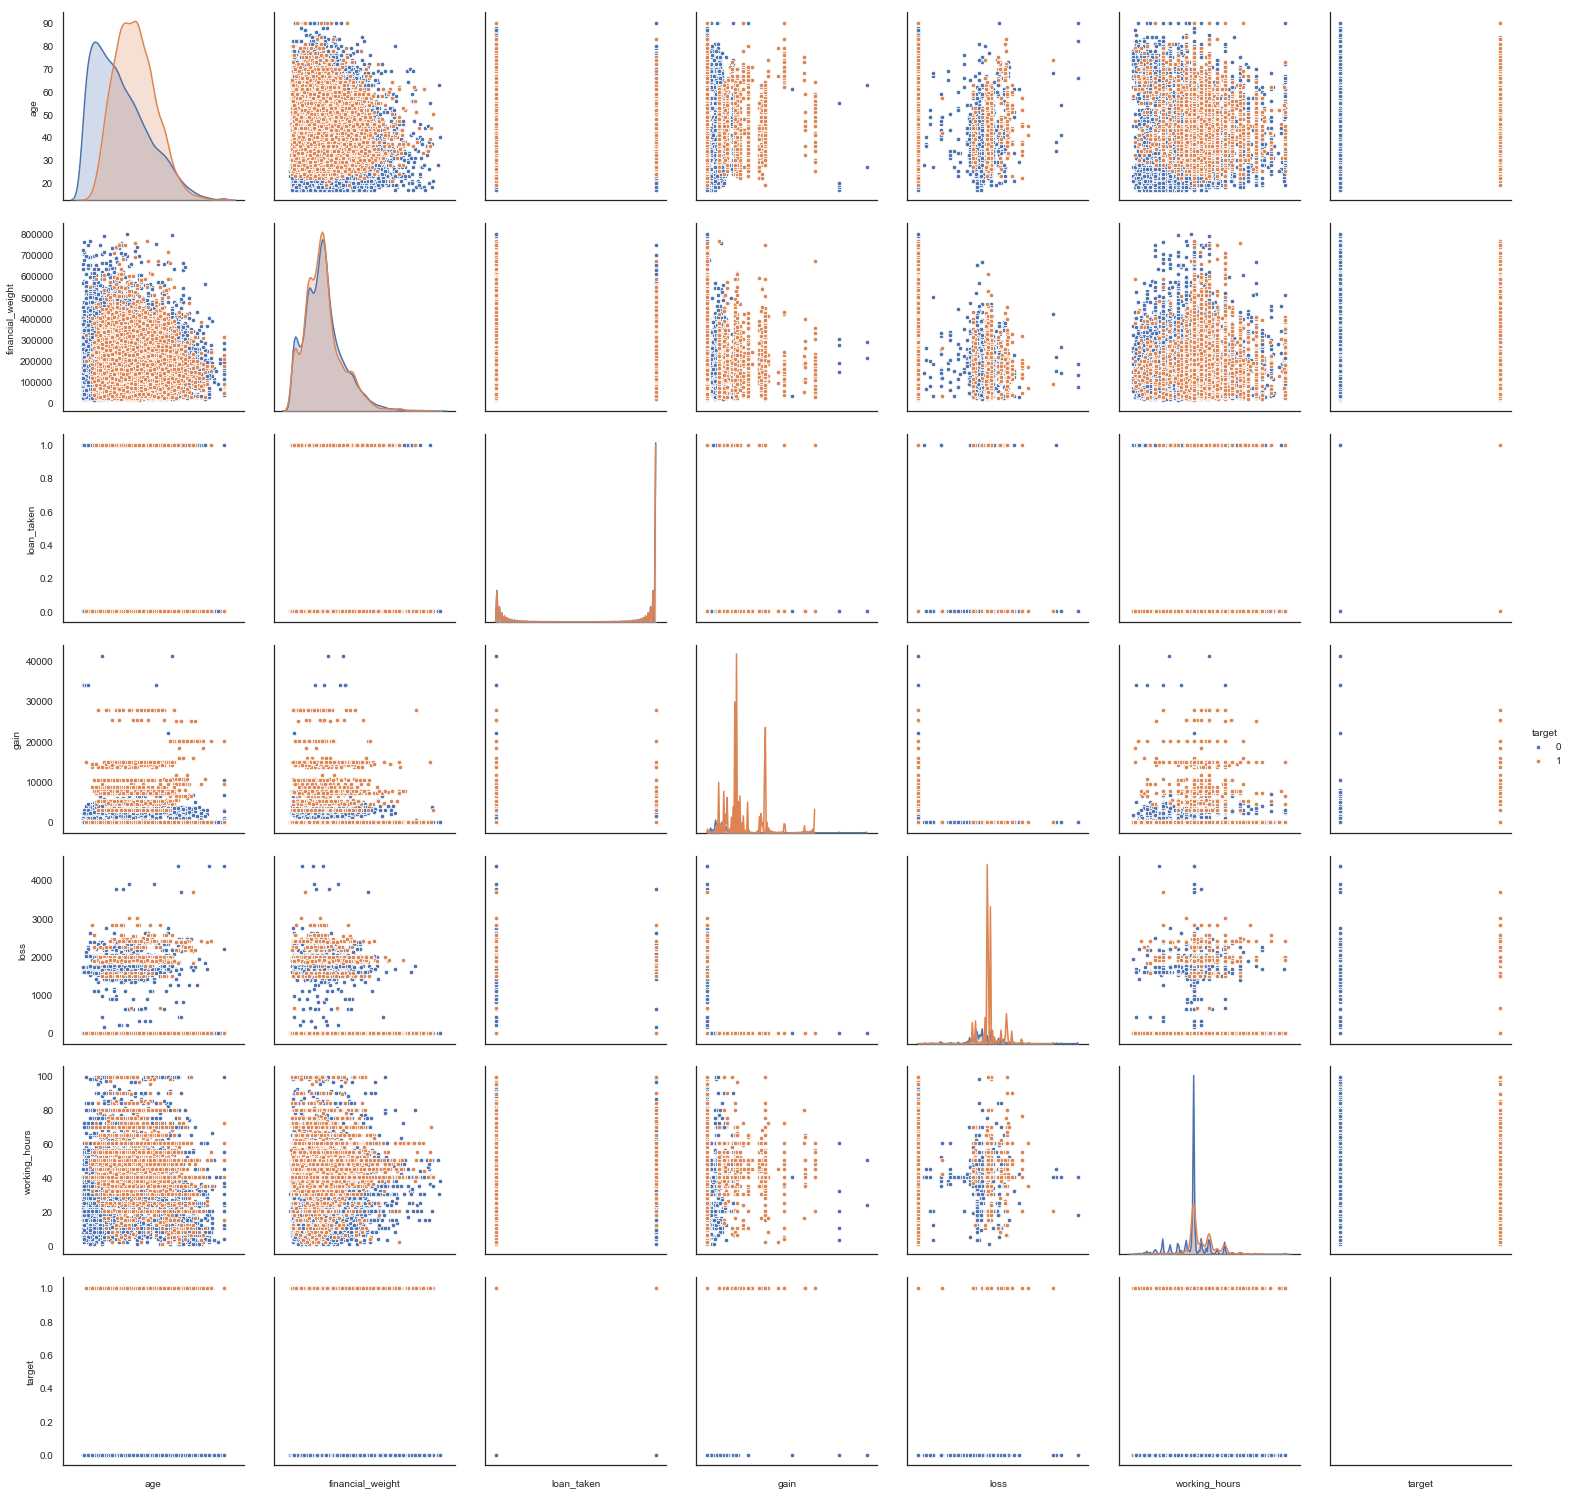

In [48]:
pp = sns.pairplot(incomeGroup_2, hue = 'target', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

__Bi-variate analysis__

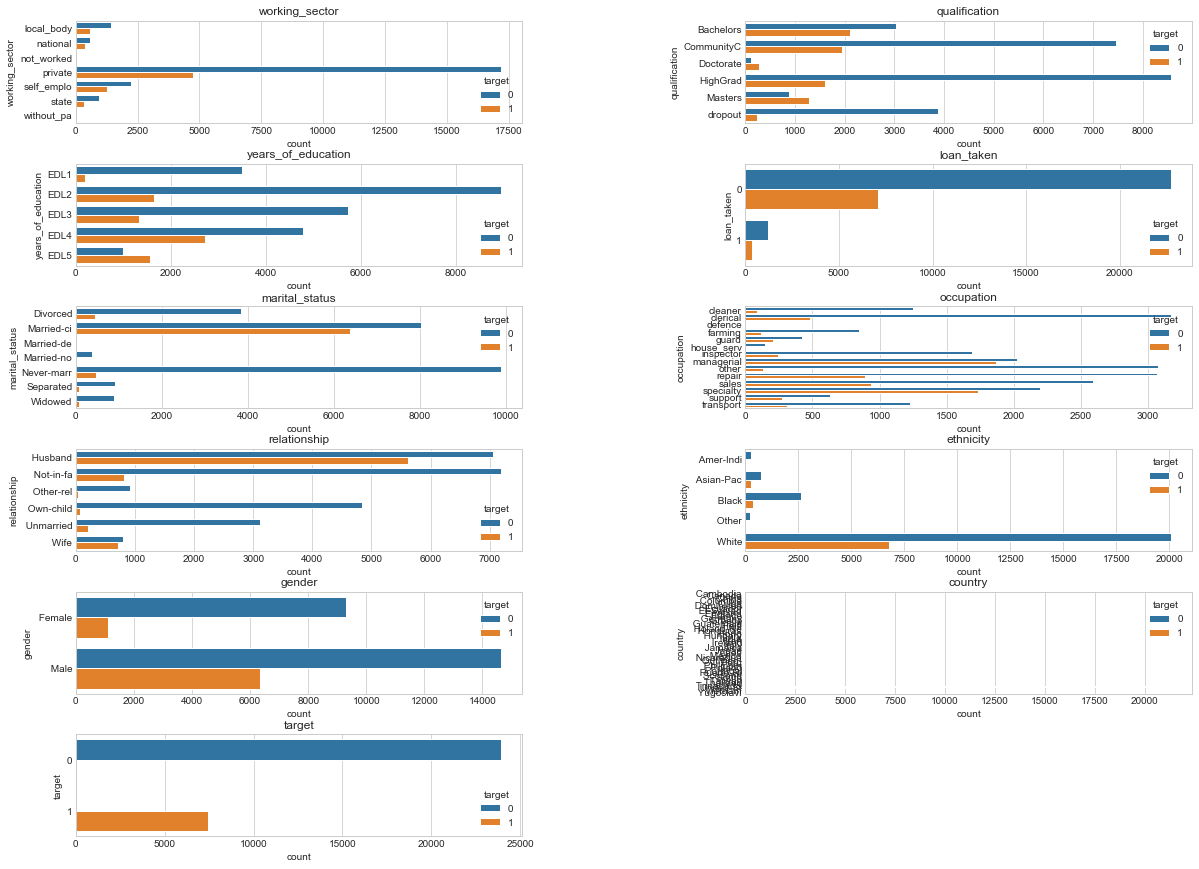

In [49]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.countplot(y=column, hue=hue, data=dataset)
        substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
        g.set(yticklabels=substrings)
            
bivariate_df =  incomeGroup_2.select_dtypes(include=['category'])

plot_bivariate_bar(bivariate_df, hue='target', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


In [50]:
#Relation Ship bewteen country & target
incomeGroup_2[['country','target']].groupby('target')['country'].nunique()

target
0    41
1    39
Name: country, dtype: int64

__Violin Plot analysis__

__GeoSpatial Plot__

__Save to outfile__

In [51]:
#incomeGroup_2.to_csv(path_or_buf="/Users/samyam/Documents/Samya/Insofe/insofe/day20/Income Dataset/crunchedDataset/incomeGroup_2.csv", index=False)


## Data PreProcessing

In [52]:
incomeGroup_2.dtypes

age                    float64
working_sector        category
financial_weight       float64
qualification         category
years_of_education    category
loan_taken            category
marital_status        category
occupation            category
relationship          category
ethnicity             category
gender                category
gain                   float64
loss                   float64
working_hours          float64
country               category
target                category
dtype: object

### Train-Test Split

In [53]:
X=incomeGroup_2.drop('target', axis=1)
y=incomeGroup_2["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25097, 15)
(6275, 15)
(25097,)
(6275,)


### Missing value imputation

In [55]:
pd.DataFrame({'total_missing': X_train.isnull().sum(), 
              'perc_missing': (X_train.isnull().sum()/X_train.shape[0])*100})

,total_missing,perc_missing
age,0,0.000000
working_sector,1376,5.482727
financial_weight,0,0.000000
qualification,0,0.000000
years_of_education,0,0.000000
loan_taken,0,0.000000
marital_status,0,0.000000
occupation,1379,5.494681
relationship,0,0.000000
ethnicity,0,0.000000


In [56]:
X_train.dtypes

age                    float64
working_sector        category
financial_weight       float64
qualification         category
years_of_education    category
loan_taken            category
marital_status        category
occupation            category
relationship          category
ethnicity             category
gender                category
gain                   float64
loss                   float64
working_hours          float64
country               category
dtype: object

In [57]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mode.fit(X_train)
X_train_array = imputer_mode.transform(X_train)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_train.head()
X_train.shape


SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

,age,working_sector,financial_weight,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country
23196,47,private,185399,HighGrad,EDL2,0,Married-civilian,other,Wife,White,Female,0,0,38,United-States
14520,35,self_employed,278632,HighGrad,EDL2,0,Married-civilian,repair,Husband,White,Male,0,0,40,United-States
10417,45,private,81400,dropout,EDL1,0,Married-civilian,other,Wife,White,Female,0,0,25,El-Salvador
10050,36,private,135289,Bachelors,EDL4,0,Married-civilian,repair,Husband,White,Male,0,0,48,United-States
29260,29,private,208406,HighGrad,EDL2,1,Never-married,repair,Not-in-family,White,Male,0,0,35,United-States


(25097, 15)

In [58]:
X_train.dtypes

age                   object
working_sector        object
financial_weight      object
qualification         object
years_of_education    object
loan_taken            object
marital_status        object
occupation            object
relationship          object
ethnicity             object
gender                object
gain                  object
loss                  object
working_hours         object
country               object
dtype: object

In [59]:
pd.DataFrame({'total_missing': X_train.isnull().sum(), 
              'perc_missing': (X_train.isnull().sum()/X_train.shape[0])*100})

,total_missing,perc_missing
age,0,0.0
working_sector,0,0.0
financial_weight,0,0.0
qualification,0,0.0
years_of_education,0,0.0
loan_taken,0,0.0
marital_status,0,0.0
occupation,0,0.0
relationship,0,0.0
ethnicity,0,0.0


In [60]:
cat_col = ['working_sector', 'qualification', 'years_of_education','loan_taken','marital_status', 'occupation', 'relationship', 
           'ethnicity', 'gender', 'country']
num_col = np.setdiff1d(X_train.columns, cat_col)

#Do the datatype conversion
for col in cat_col:
    X_train[col] = X_train[col].astype('category', copy=True)

for col in num_col:
    X_train[col] = X_train[col].astype('float', copy=True)

X_train.dtypes


age                    float64
working_sector        category
financial_weight       float64
qualification         category
years_of_education    category
loan_taken            category
marital_status        category
occupation            category
relationship          category
ethnicity             category
gender                category
gain                   float64
loss                   float64
working_hours          float64
country               category
dtype: object

In [61]:
X_train_cat = X_train[cat_col]
X_train_num = X_train[num_col]

In [62]:
X_train_cat.head()
X_train_num.head()

,working_sector,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,country
23196,private,HighGrad,EDL2,0,Married-civilian,other,Wife,White,Female,United-States
14520,self_employed,HighGrad,EDL2,0,Married-civilian,repair,Husband,White,Male,United-States
10417,private,dropout,EDL1,0,Married-civilian,other,Wife,White,Female,El-Salvador
10050,private,Bachelors,EDL4,0,Married-civilian,repair,Husband,White,Male,United-States
29260,private,HighGrad,EDL2,1,Never-married,repair,Not-in-family,White,Male,United-States


,age,financial_weight,gain,loss,working_hours
23196,47.0,185399.0,0.0,0.0,38.0
14520,35.0,278632.0,0.0,0.0,40.0
10417,45.0,81400.0,0.0,0.0,25.0
10050,36.0,135289.0,0.0,0.0,48.0
29260,29.0,208406.0,0.0,0.0,35.0


### One Hot Encoding

In [63]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [64]:
multiCol_label_encoder = MultiColumnLabelEncoder()
X_train_cat_le = multiCol_label_encoder.fit_transform(X_train_cat)
X_train_cat_le.head()

,working_sector,qualification,years_of_education,loan_taken,marital_status,occupation,relationship,ethnicity,gender,country
23196,3,3,1,0,1,8,5,4,0,38
14520,4,3,1,0,1,9,0,4,1,38
10417,3,5,0,0,1,8,5,4,0,7
10050,3,0,3,0,1,9,0,4,1,38
29260,3,3,1,1,4,9,1,4,1,38


In [65]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_cat_le)
X_train_cat_onehot_encoded_array = enc.transform(X_train_cat_le).toarray()
X_train_cat_onehot_encoded_array
enc.get_feature_names()

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x1_0',
       'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x2_0', 'x2_1', 'x2_2',
       'x2_3', 'x2_4', 'x3_0', 'x3_1', 'x4_0', 'x4_1', 'x4_2', 'x4_3',
       'x4_4', 'x4_5', 'x4_6', 'x5_0', 'x5_1', 'x5_2', 'x5_3', 'x5_4',
       'x5_5', 'x5_6', 'x5_7', 'x5_8', 'x5_9', 'x5_10', 'x5_11', 'x5_12',
       'x5_13', 'x6_0', 'x6_1', 'x6_2', 'x6_3', 'x6_4', 'x6_5', 'x7_0',
       'x7_1', 'x7_2', 'x7_3', 'x7_4', 'x8_0', 'x8_1', 'x9_0', 'x9_1',
       'x9_2', 'x9_3', 'x9_4', 'x9_5', 'x9_6', 'x9_7', 'x9_8', 'x9_9',
       'x9_10', 'x9_11', 'x9_12', 'x9_13', 'x9_14', 'x9_15', 'x9_16',
       'x9_17', 'x9_18', 'x9_19', 'x9_20', 'x9_21', 'x9_22', 'x9_23',
       'x9_24', 'x9_25', 'x9_26', 'x9_27', 'x9_28', 'x9_29', 'x9_30',
       'x9_31', 'x9_32', 'x9_33', 'x9_34', 'x9_35', 'x9_36', 'x9_37',
       'x9_38', 'x9_39', 'x9_40'], dtype=object)

In [66]:
X_train_cat_onehot_encoded_df = pd.DataFrame(X_train_cat_onehot_encoded_array, index=X_train_cat_le.index, columns=enc.get_feature_names().tolist())
X_train_cat_onehot_encoded_df.head()
X_train_cat_onehot_encoded_df.shape


,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x1_0,x1_1,x1_2,x1_3,x1_4,x1_5,x2_0,x2_1,x2_2,x2_3,x2_4,x3_0,x3_1,x4_0,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6,x5_0,x5_1,x5_2,x5_3,x5_4,x5_5,x5_6,x5_7,x5_8,x5_9,x5_10,x5_11,x5_12,x5_13,x6_0,x6_1,x6_2,x6_3,x6_4,x6_5,x7_0,x7_1,x7_2,x7_3,x7_4,x8_0,x8_1,x9_0,x9_1,x9_2,x9_3,x9_4,x9_5,x9_6,x9_7,x9_8,x9_9,x9_10,x9_11,x9_12,x9_13,x9_14,x9_15,x9_16,x9_17,x9_18,x9_19,x9_20,x9_21,x9_22,x9_23,x9_24,x9_25,x9_26,x9_27,x9_28,x9_29,x9_30,x9_31,x9_32,x9_33,x9_34,x9_35,x9_36,x9_37,x9_38,x9_39,x9_40
23196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14520,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10050,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(25097, 95)

### Standadization/ Nornalization

In [67]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled_array = scaler.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled_array, index=X_train_num.index, columns=X_train_num.columns)
X_train_num_scaled.head()
X_train_num_scaled.shape

StandardScaler(copy=True, with_mean=True, with_std=True)

,age,financial_weight,gain,loss,working_hours
23196,0.623425,-0.039594,-0.232805,-0.215142,-0.194414
14520,-0.258886,0.867123,-0.232805,-0.215142,-0.032066
10417,0.476373,-1.051014,-0.232805,-0.215142,-1.249674
10050,-0.185360,-0.526928,-0.232805,-0.215142,0.617325
29260,-0.700042,0.184155,-0.232805,-0.215142,-0.437935


(25097, 5)

In [68]:
# Join dataset after scaling & encoding
X_train_altered = pd.concat([X_train_num_scaled, X_train_cat_onehot_encoded_df], axis=1)
X_train_altered.head()
X_train_altered.shape

,age,financial_weight,gain,loss,working_hours,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x1_0,x1_1,x1_2,x1_3,x1_4,x1_5,x2_0,x2_1,x2_2,x2_3,x2_4,x3_0,x3_1,x4_0,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6,x5_0,x5_1,x5_2,x5_3,x5_4,x5_5,x5_6,x5_7,x5_8,x5_9,x5_10,x5_11,x5_12,x5_13,x6_0,x6_1,x6_2,x6_3,x6_4,x6_5,x7_0,x7_1,x7_2,x7_3,x7_4,x8_0,x8_1,x9_0,x9_1,x9_2,x9_3,x9_4,x9_5,x9_6,x9_7,x9_8,x9_9,x9_10,x9_11,x9_12,x9_13,x9_14,x9_15,x9_16,x9_17,x9_18,x9_19,x9_20,x9_21,x9_22,x9_23,x9_24,x9_25,x9_26,x9_27,x9_28,x9_29,x9_30,x9_31,x9_32,x9_33,x9_34,x9_35,x9_36,x9_37,x9_38,x9_39,x9_40
23196,0.623425,-0.039594,-0.232805,-0.215142,-0.194414,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14520,-0.258886,0.867123,-0.232805,-0.215142,-0.032066,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10417,0.476373,-1.051014,-0.232805,-0.215142,-1.249674,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10050,-0.185360,-0.526928,-0.232805,-0.215142,0.617325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29260,-0.700042,0.184155,-0.232805,-0.215142,-0.437935,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(25097, 100)

In [69]:
y_train.head()
y_train.shape

23196    0
14520    0
10417    0
10050    1
29260    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

(25097,)

## Model Building

In [70]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_grid = XGBClassifier(nthread=-1)
param_grid = { 
           "n_estimators" : [100, 200, 500, 600, 800, 1000],
           "learning_rate" : [0.1,0.2,0.3,0.4,0.5,0.6],
            "gamma" : [0.2,0.3,0.4,0.5,0.6]}
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

rfc_cv_grid.fit(X = X_train_altered, y = y_train)

In [ ]:
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

In [ ]:
#Choose the model that performs best
#model_XGB = XGBClassifier(n_estimators=1000, gamma=0.5,learning_rate=0.1, nthread=-1)
model_XGB.fit(X_train_altered,y_train)

In [ ]:
y_train_pred = model_XGB.predict(X_train_altered)
print(accuracy_score(y_train,y_train_pred))

## Evaluate the model

In [ ]:
X_test.head()

In [ ]:
#Missing value imputation
pd.DataFrame({'total_missing': X_test.isnull().sum(), 
              'perc_missing': (X_test.isnull().sum()/X_test.shape[0])*100})

X_test_array = imputer_mode.transform(X_test)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)
X_test.head()
X_test.shape

pd.DataFrame({'total_missing': X_test.isnull().sum(), 
              'perc_missing': (X_test.isnull().sum()/X_test.shape[0])*100})          


cat_col = ['working_sector', 'qualification', 'years_of_education','loan_taken','marital_status', 'occupation', 'relationship', 
           'ethnicity', 'gender', 'country']
num_col = np.setdiff1d(X_test.columns, cat_col)


#Do the datatype conversion
for col in cat_col:
    X_test[col] = X_test[col].astype('category', copy=True)

for col in num_col:
    X_test[col] = X_test[col].astype('float', copy=True)

X_test.dtypes



In [ ]:
#onehotencode & Standardise data
X_test_cat = X_test[cat_col]
X_test_num = X_test[num_col]

X_test_cat_le = multiCol_label_encoder.transform(X_test_cat)

X_test_cat_onehot_encoded_array = enc.transform(X_test_cat_le).toarray()
X_test_cat_onehot_encoded_df = pd.DataFrame(X_test_cat_onehot_encoded_array, 
                                            index=X_test_cat_le.index, columns=enc.get_feature_names().tolist())
X_test_cat_onehot_encoded_df.head()
X_test_cat_onehot_encoded_df.shape


X_test_num_scaled_array = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled_array, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scaled.head()
X_test_num_scaled.shape


# Join dataset after scaling & encoding
X_test_altered = pd.concat([X_test_num_scaled, X_test_cat_onehot_encoded_df], axis=1)
X_test_altered.head()
X_test_altered.shape

In [ ]:
y_test_pred = model_XGB.predict(X_test_altered)
print(accuracy_score(y_test,y_test_pred))

## Run the model on actual test data

In [ ]:
#Load test data
incomeGroup_test=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/day20/Income Dataset/test_data.csv",
                             na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(incomeGroup_test.shape[0]))
print("The number of Columns in the Income Group data set =" +str(incomeGroup_test.shape[1]))


In [ ]:
pd.DataFrame({'total_missing': incomeGroup_test.isnull().sum(), 
              'perc_missing': (incomeGroup_test.isnull().sum()/incomeGroup_test.shape[0])*100})

In [ ]:
incomeGroup_test_1 = incomeGroup_test.drop(["index","tax_paid"],axis=1)

In [ ]:
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Preschool', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('10th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('11th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('12th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('1st-4th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('5th-6th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('7th-8th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('9th', 'dropout')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('HS-grad', 'HighGrad')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Some-college', 'CommunityCollege')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Assoc-acdm', 'CommunityCollege')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Assoc-voc', 'CommunityCollege')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Bachelors', 'Bachelors')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Masters', 'Masters')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Prof-school', 'Masters')
incomeGroup_test_1['qualification'] = incomeGroup_test_1['qualification'].str.strip().replace('Doctorate', 'Doctorate')

bins = [0,7, 9, 10, 13,16]
labels = ['EDL1','EDL2','EDL3','EDL4','EDL5']
incomeGroup_test_1['years_of_education'] = pd.cut(incomeGroup_test_1['years_of_education'], bins=bins, labels=labels)

incomeGroup_test_1.head()



In [ ]:
incomeGroup_test_1.dtypes

In [ ]:
#Missing value imputation
pd.DataFrame({'total_missing': incomeGroup_test_1.isnull().sum(), 
              'perc_missing': (incomeGroup_test_1.isnull().sum()/incomeGroup_test_1.shape[0])*100})

incomeGroup_test_1_array = imputer_mode.transform(incomeGroup_test_1)
incomeGroup_test_1 = pd.DataFrame(incomeGroup_test_1_array, index=incomeGroup_test_1.index, 
                                  columns=incomeGroup_test_1.columns)
incomeGroup_test_1.head()
incomeGroup_test_1.shape

pd.DataFrame({'total_missing': incomeGroup_test_1.isnull().sum(), 
              'perc_missing': (incomeGroup_test_1.isnull().sum()/incomeGroup_test_1.shape[0])*100})          


cat_col = ['working_sector', 'qualification', 'years_of_education','loan_taken','marital_status', 'occupation', 'relationship', 
           'ethnicity', 'gender', 'country']
num_col = np.setdiff1d(incomeGroup_test_1.columns, cat_col)


#Do the datatype conversion
for col in cat_col:
    incomeGroup_test_1[col] = incomeGroup_test_1[col].astype('category', copy=True)

for col in num_col:
    incomeGroup_test_1[col] = incomeGroup_test_1[col].astype('float', copy=True)

incomeGroup_test_1.dtypes


In [ ]:
#onehotencode & Standardise data
X_test_actual_cat = incomeGroup_test_1[cat_col]
X_test_actual_num = incomeGroup_test_1[num_col]

X_test_actual_cat_le = multiCol_label_encoder.transform(X_test_actual_cat)


X_test_actual_cat_onehot_encoded_array = enc.transform(X_test_actual_cat_le).toarray()
X_test_actual_cat_onehot_encoded_df = pd.DataFrame(X_test_actual_cat_onehot_encoded_array, 
                                            index=X_test_actual_cat_le.index, columns=enc.get_feature_names().tolist())
X_test_actual_cat_onehot_encoded_df.head()
X_test_actual_cat_onehot_encoded_df.shape





X_test_actual_num_scaled_array = scaler.transform(X_test_actual_num)
X_test_actual_num_scaled = pd.DataFrame(X_test_actual_num_scaled_array, index=X_test_actual_num.index, 
                                 columns=X_test_actual_num.columns)
X_test_actual_num_scaled.head()
X_test_actual_num_scaled.shape


# Join dataset after scaling & encoding
X_test_actual_altered = pd.concat([X_test_actual_num_scaled, X_test_actual_cat_onehot_encoded_df], axis=1)
X_test_actual_altered.head()
X_test_actual_altered.shape


In [ ]:
y_test_actual_pred = model_XGB.predict(X_test_actual_altered)
pd.DataFrame(y_test_actual_pred)

In [ ]:
#y_test_actual_pred.to_csv(path_or_buf="/Users/samyam/Documents/Samya/Insofe/insofe/day20/Income Dataset/crunchedDataset/output_v1.csv", index=False)
pd.DataFrame(y_test_actual_pred).to_csv(path_or_buf="/Users/samyam/Documents/Samya/Insofe/insofe/day20/Income Dataset/crunchedDataset/output_v2.csv", index=False)


## Backup